In [1]:
# Import necessary libraries for data analysis and visualization
import pandas as pd  # For handling structured data
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For creating visualizations
import datetime  # For working with date and time data
import seaborn as sns  # For statistical data visualizations

In [2]:
# Load MS Dhoni's ODI record dataset into a Pandas DataFrame
df = pd.read_csv("C:/Users/dbda.STUDENTSDC/Music/LabPractice/Notebooks/Datasets/MS_Dhoni_ODI_record.csv")  # Reading the CSV file and storing it in 'df'

In [3]:
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,v Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,v Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,05/04/2005,ODI # 2236


In [4]:
# Display the first few rows of the dataset
print(df.head())  # Shows the first 5 records for a quick overview of structure

# Display the last few rows of the dataset
print(df.tail())  # Shows the last 5 records to examine dataset continuity

  score runs_scored balls_faced strike_rate fours sixes    opposition  \
0     0           0           1           0     0     0  v Bangladesh   
1    12          12          11      109.09     2     0  v Bangladesh   
2    7*           7           2         350     0     1  v Bangladesh   
3     3           3           7       42.85     0     0    v Pakistan   
4   148         148         123      120.32    15     4    v Pakistan   

          ground        date  odi_number  
0     Chattogram  23/12/2004  ODI # 2199  
1          Dhaka  26/12/2004  ODI # 2201  
2          Dhaka  27/12/2004  ODI # 2202  
3          Kochi  02/04/2005  ODI # 2235  
4  Visakhapatnam  05/04/2005  ODI # 2236  
    score runs_scored balls_faced strike_rate fours sixes     opposition  \
345   56*          56          61        91.8     3     2  v West Indies   
346   42*          42          31      135.48     4     1      v England   
347    35          35          33      106.06     4     0   v Bangladesh   

In [5]:
# Data cleaning - Removing 'v' from opposition names
# Example: 'v Aus' → 'Aus'

# Alternative approach using .apply()
# df['opposition'] = df['opposition'].apply(lambda x: x[2:])
# This slices off the first two characters from the string

df['opposition'] = df['opposition'].str.replace('v', '', regex=False)
# Using .str.replace() to remove 'v' from the opposition column
# 'regex=False' ensures 'v' is treated as a literal string, not a regex pattern

In [6]:
# Add a 'year' feature using the match date column

# Convert the 'date' column into datetime format (day-first format)
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
# Ensures correct parsing of dates, especially if data follows 'DD-MM-YYYY' format

# Extract the year from the datetime column
df['year'] = df['date'].dt.year.astype(int)
# Retrieves only the year and ensures it's stored as an integer for analysis

# Check the first few rows to confirm the new feature
# print(df.head())

In [7]:
# Create a column to distinguish between "out" and "not out" innings

# Convert 'score' column values to string format to ensure consistency
df['score'] = df['score'].apply(str)

# Identify "not out" innings (indicated by '*' in the score)
df['not_out'] = np.where(df['score'].str.endswith('*'), 1, 0)
# If the score ends with '*', mark as 1 (not out); otherwise, 0 (out)

# Drop the 'odi_number' column, as it doesn't add analytical value
df.drop(columns='odi_number', inplace=True)

# Create a new DataFrame by removing innings where Dhoni did not bat ('DNB' or 'TDNB')
df_new = df.loc[((df['score'] != 'DNB') & (df['score'] != 'TDNB')), 'runs_scored':]

# Display the first few rows of the cleaned DataFrame
print(df_new.head())

  runs_scored balls_faced strike_rate fours sixes   opposition         ground  \
0           0           1           0     0     0   Bangladesh     Chattogram   
1          12          11      109.09     2     0   Bangladesh          Dhaka   
2           7           2         350     0     1   Bangladesh          Dhaka   
3           3           7       42.85     0     0     Pakistan          Kochi   
4         148         123      120.32    15     4     Pakistan  Visakhapatnam   

        date  year  not_out  
0 2004-12-23  2004        0  
1 2004-12-26  2004        0  
2 2004-12-27  2004        1  
3 2005-04-02  2005        0  
4 2005-04-05  2005        0  


In [8]:
# Fixing the data types of numerical columns for accurate calculations

df_new['runs_scored'] = df_new['runs_scored'].astype(int)  # Converting runs to integer format
df_new['balls_faced'] = df_new['balls_faced'].astype(int)  # Converting balls faced to integer
df_new['strike_rate'] = df_new['strike_rate'].astype(float)  # Converting strike rate to float for precision
df_new['fours'] = df_new['fours'].astype(int)  # Converting count of fours to integer
df_new['sixes'] = df_new['sixes'].astype(int)  # Converting count of sixes to integer

In [9]:
# Career Stats Calculation

# Extract the first match date and format it
first_match_date = df['date'].dt.date.min().strftime('%B %d, %Y')
print('First Match: ', first_match_date)

# Extract the last match date and format it
last_match_date = df['date'].dt.date.max().strftime('%B %d, %Y')
print('Last Match: ', last_match_date)

# Calculate the total number of matches played
number_of_matches = df.shape[0]
print("Number of matches played: ", number_of_matches)

# Calculate the total number of innings where Dhoni batted
number_of_inns = df_new.shape[0]
print("Number of innings played: ", number_of_inns)

First Match:  December 23, 2004
Last Match:  July 09, 2019
Number of matches played:  350
Number of innings played:  297


In [10]:
# Print career stats summary

print("Number of innings played: ", number_of_inns)

# Calculate the total number of 'not out' innings
not_outs = df_new['not_out'].sum()
print("Not outs: ", not_outs)

# Total runs scored in career
runs_scored = df_new['runs_scored'].sum()
print("Runs scored in career: ", runs_scored)

# Total balls faced in career
balls_faced = df_new['balls_faced'].sum()
print("Balls faced in career: ", balls_faced)

# Career strike rate calculation
career_sr = (runs_scored / balls_faced) * 100
print('Career strike rate: {:.2f}'.format(career_sr))

# Career batting average calculation
career_avg = (runs_scored / (number_of_inns - not_outs))
print("Career average: {:.2f}".format(career_avg))

# Highest individual score in career
highest_score = df_new['runs_scored'].max()
print('Highest score in career: ', highest_score)

# Number of centuries scored
hundreds = (df_new['runs_scored'] >= 100).sum()
print('Number of hundreds: ', hundreds)

# Number of fifties scored
fifties = (((df_new['runs_scored']) >= 50) & (df_new['runs_scored'] < 100)).sum()
print('No. of fifties: ', fifties)

# Total number of fours hit in career
fours = df_new['fours'].sum()
print('Number of fours: ', fours)

Number of innings played:  297
Not outs:  84
Runs scored in career:  10773
Balls faced in career:  12303
Career strike rate: 87.56
Career average: 50.58
Highest score in career:  183
Number of hundreds:  10
No. of fifties:  73
Number of fours:  826


In [11]:
# Calculate the total number of sixes in career
sixes = df_new['sixes'].sum()  # Summing up sixes across all innings
print('Number of 6s: ', sixes)  # Displaying total six count

Number of 6s:  229


opposition
Sri Lanka       67
Australia       55
England         48
West Indies     39
South Africa    37
Pakistan        36
New Zealand     28
Bangladesh      21
Zimbabwe         6
Africa XI        3
Hong Kong        2
Ireland          2
Afghanistan      2
Bermuda          1
Scotland         1
Netherlands      1
U.A.E.           1
Name: count, dtype: int64


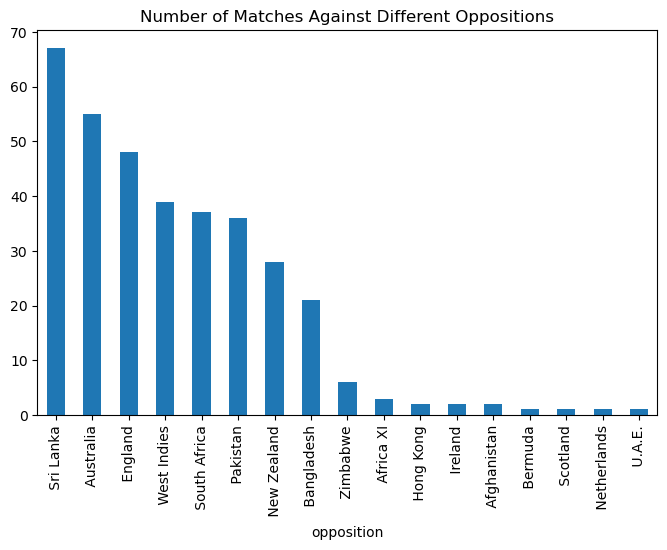

In [12]:
# Count the occurrences of each unique value in the 'opposition' column
# This will create a Series with opposition names as index and match counts as values
opposition_counts = df['opposition'].value_counts()

# Display the match count against each opposition team
print(opposition_counts)

# Plot the counts as a bar plot
opposition_counts.plot(kind='bar',
                       title='Number of Matches Against Different Oppositions',
                       figsize=(8, 5))

plt.show()  # Display the bar plot visualization

opposition
Afghanistan       36
Africa XI        174
Australia       1660
Bangladesh       569
Bermuda           29
England         1546
Hong Kong        109
Ireland           34
Netherlands       19
New Zealand      940
Pakistan        1231
South Africa     830
Sri Lanka       2383
West Indies     1005
Zimbabwe         208
Name: runs_scored, dtype: int64


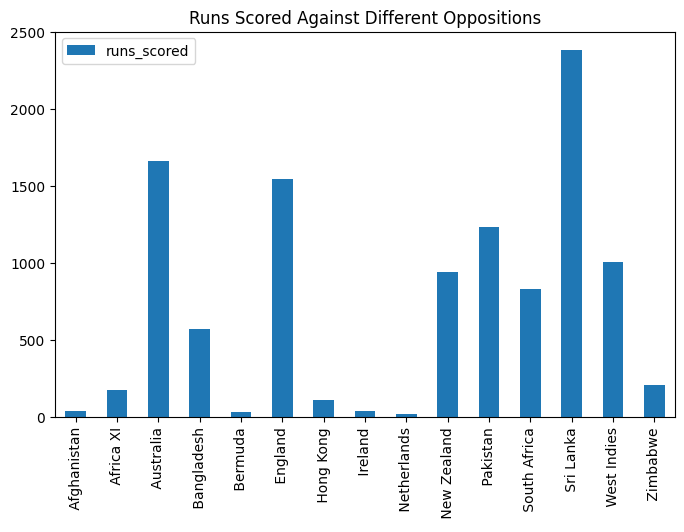

In [ ]:
# Runs scored against each team

# Group the DataFrame by 'opposition' column
grouped_by_opposition = df_new.groupby('opposition')

# Calculate the total runs scored against each team
sum_of_runs_scored = grouped_by_opposition['runs_scored'].sum()
print(sum_of_runs_scored)  # Display the total runs scored against each opposition

# Convert the Series to a DataFrame and reset the index
runs_scored_by_opposition = pd.DataFrame(sum_of_runs_scored).reset_index()

# Create a bar plot to visualize runs scored against different teams
runs_scored_by_opposition.plot(x='opposition',
                               kind='bar',
                               title='Runs Scored Against Different Oppositions',
                               figsize=(8, 5))

plt.xlabel(None)  # Remove x-axis label for better visualization
plt.show()  # Display the final plot

In [13]:
# Sorting opposition-wise runs in descending order for better readability
sorted = runs_scored_by_opposition.sort_values(by='runs_scored', ascending=False)

# Creating a sorted bar plot
sorted.plot(x='opposition', kind='bar',
            title='Runs Scored Against Different Oppositions',
            figsize=(8, 5))

plt.xlabel(None)  # Removing the x-axis label for a cleaner look
plt.show()  # Displaying the updated visualization

NameError: name 'runs_scored_by_opposition' is not defined

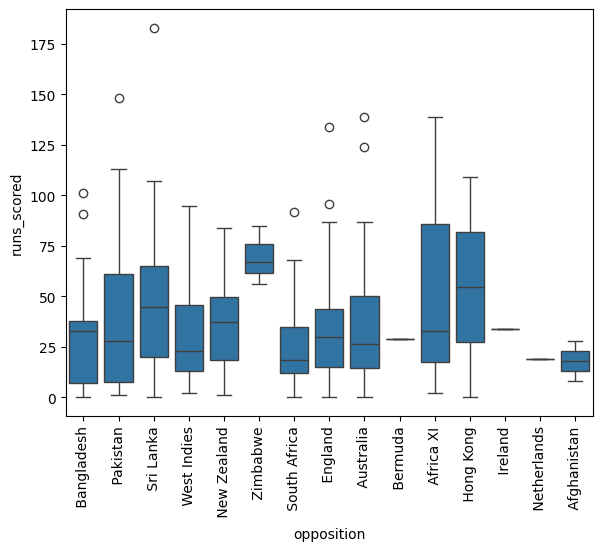

In [ ]:
# Boxplot - Runs scored against different oppositions

sns.boxplot(x='opposition', y='runs_scored', data=df_new)
# Using Seaborn's boxplot to show the distribution of runs per opposition
# Helps identify median, quartiles, and potential outliers in Dhoni's performances

plt.tight_layout()  # Adjusting layout to prevent overlapping labels
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.show()  # Displaying the final plot

     runs_scored  balls_faced  strike_rate  fours  sixes    opposition  \
0              0            1         0.00      0      0    Bangladesh   
1             12           11       109.09      2      0    Bangladesh   
2              7            2       350.00      0      1    Bangladesh   
3              3            7        42.85      0      0      Pakistan   
4            148          123       120.32     15      4      Pakistan   
..           ...          ...          ...    ...    ...           ...   
343            1            2        50.00      0      0      Pakistan   
345           56           61        91.80      3      2   West Indies   
346           42           31       135.48      4      1       England   
347           35           33       106.06      4      0    Bangladesh   
349           50           72        69.44      1      1   New Zealand   

            ground       date  year  not_out  
0       Chattogram 2004-12-23  2004        0  
1            Dhak

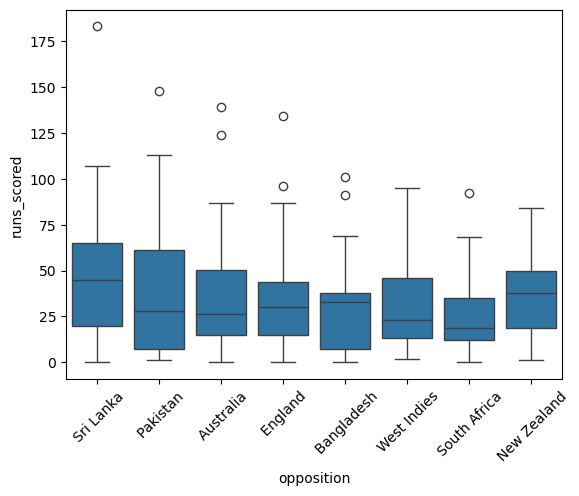

In [14]:
# Filter major cricketing nations for better readability

opposition_list = [' England', ' Australia', ' West Indies',
                   ' South Africa', ' New Zealand',
                   ' Pakistan', ' Sri Lanka', ' Bangladesh']

# Filter rows where 'opposition' belongs to the major teams list
df_filtered = df_new[df_new['opposition'].isin(opposition_list)]
print(df_filtered)  # Display the filtered DataFrame
print(df_new)  # Display the original DataFrame (for comparison)

# Sort the filtered DataFrame in descending order of runs scored
df_filtered = df_filtered.sort_values(by="runs_scored", ascending=False)

# Redraw the boxplot with only selected opposition teams
sns.boxplot(x='opposition', y='runs_scored', data=df_filtered)
plt.xticks(rotation=45)  # Adjust x-axis label rotation for clarity
plt.show()  # Display the final plot

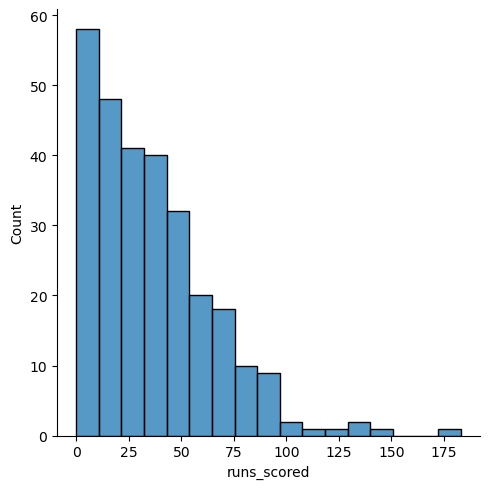

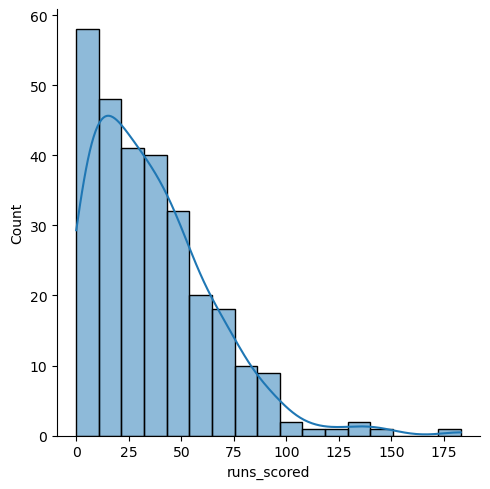

In [15]:
# Histogram (distplot) without KDE (Kernel Density Estimation)
sns.displot(data=df_filtered, x='runs_scored', kde=False)
# Creates a histogram to visualize the frequency of runs scored
# kde=False ensures only histogram bars are plotted
plt.show()

# Observing skew in the data distribution

# Histogram (distplot) with KDE enabled
sns.displot(data=df_filtered, x='runs_scored', kde=True)
# Adds a KDE curve to highlight the underlying distribution trend
plt.show()

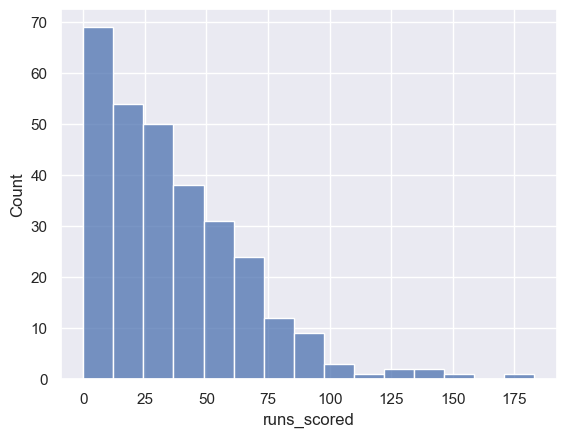

In [16]:
# Histogram with customized bin size

sns.set(style='darkgrid')  # Applying a dark grid theme for better readability

sns.histplot(data=df_new, x='runs_scored', bins=15)
# Using Seaborn's histplot to visualize the distribution of runs scored
# 'bins=15' ensures a balanced granularity in interval grouping

plt.show()  # Displaying the final histogram

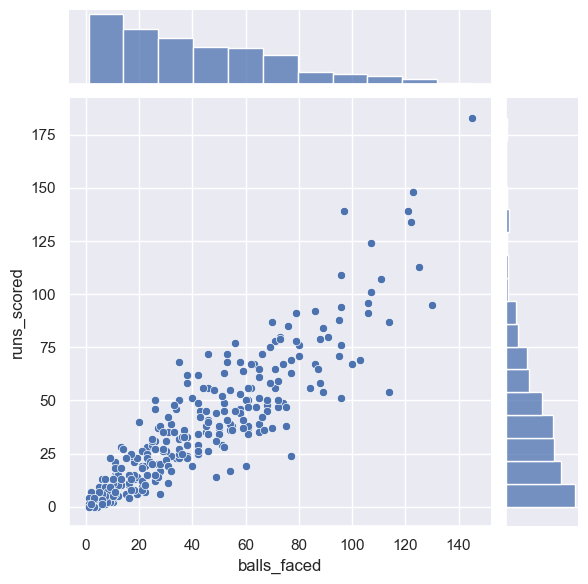

In [17]:
# Joint Plot - Scatter plot of Balls Faced vs. Runs Scored

sns.jointplot(x='balls_faced', y='runs_scored', data=df_new, kind='scatter')
# Creates a scatter-based joint plot showing correlation between balls faced and runs scored

plt.show()  # Displaying the final visualization

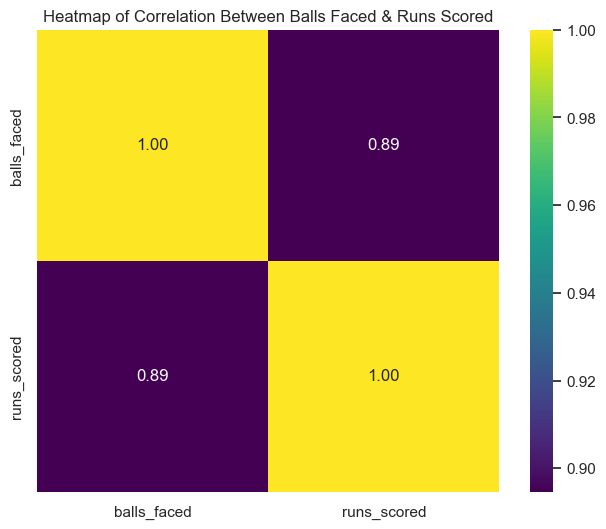

In [18]:
# Calculate the correlation matrix for selected features
correlation_matrix = df_new[['balls_faced', 'runs_scored']].corr()
# Computes Pearson correlation between balls faced and runs scored

# Set figure size for better readability
plt.figure(figsize=(8, 6))

# Create heatmap to visualize correlations
sns.heatmap(data=correlation_matrix, annot=True, cmap='viridis',
            square=True, fmt=".2f")
# 'annot=True' adds numerical correlation values on the heatmap
# 'cmap="viridis"' applies a visually appealing colormap
# 'square=True' ensures uniform cell sizes
# 'fmt=".2f"' formats displayed values to two decimal places

plt.title('Heatmap of Correlation Between Balls Faced & Runs Scored')  # Corrected title
plt.show()  # Displaying the heatmap

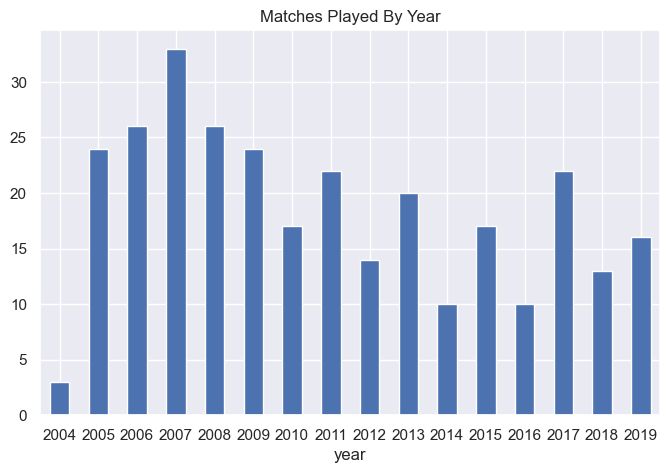

In [19]:
# Year-wise record of matches played

year_counts = df_new['year'].value_counts()
# Counts the number of matches played in each year

sorted_counts = year_counts.sort_index()
# Sorts the match counts by year in ascending order

# Create a bar plot to visualize matches played per year
sorted_counts.plot(kind='bar',
                   title='Matches Played By Year',
                   figsize=(8,5))

plt.xticks(rotation=0)  # Keep x-axis labels horizontal for better readability
plt.show()  # Display the final visualization

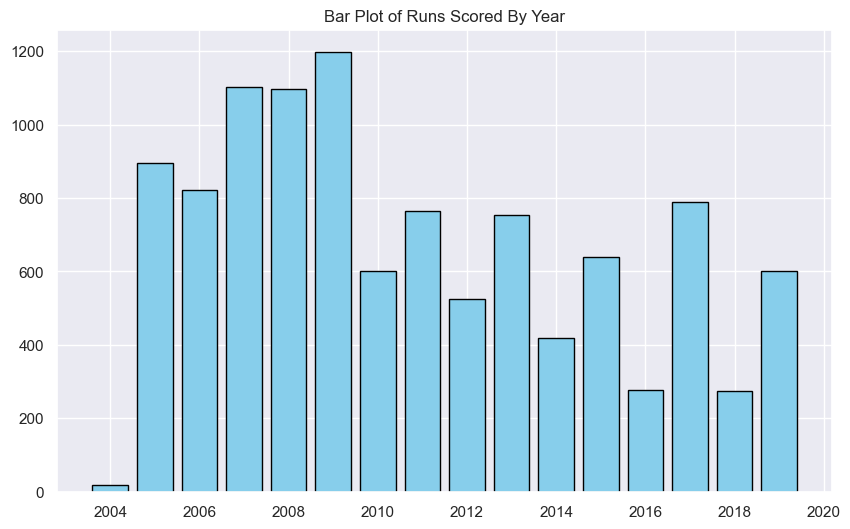

In [20]:
# Group dataset by year and sum the total runs scored each year
grouped_by_year = df_new.groupby('year')
sum_of_runs_scored = grouped_by_year['runs_scored'].sum()

# Convert grouped Series into a DataFrame for easier plotting
df_grouped = sum_of_runs_scored.reset_index()

# Set figure size for clear visualization
plt.figure(figsize=(10, 6))

# Extract x (years) and y (runs scored) values for plotting
x_values = df_grouped['year']
y_values = df_grouped['runs_scored']

# Create a bar plot to visualize runs scored per year
plt.bar(x_values, y_values, color='skyblue', edgecolor='black')
# 'color' enhances visibility, while 'edgecolor' ensures distinct bars

plt.title('Bar Plot of Runs Scored By Year')  # Title for context
plt.show()  # Display the final visualization